# Exercise 1a: Calculating income specific footprints for Germany


**Prerequisites**
- Basic knowledge of Input-Output Analysis (completed part Methodology 5: Input-output analysis of the IEooc)
- Basic knowledge on Python (see here for help https://simschul.github.io/python_basics/python_cheatsheet.html)
- Basic knowledge (and an installation) of the Pymrio python package (read https://pymrio.readthedocs.io/en/latest/intro.html#)
- EXIOBASE for the year 2013 in the product by product variant (pxp) (you can find it here: https://zenodo.org/records/5589597 , download the file “IOT_2013_pxp.zip” and save it to your computer) 

## Import libraries

In [1]:
# import libraries
import pandas as pd
import numpy as np
import pymrio
import os
from plotnine import *


## Specify paths

It's good practice to specify all paths at the beginning of your script so that other people who want to run your script directly know which lines to adapt to run the script in their own computer. 

In [2]:
path2final_demand = '../data'
path2exiobase = '/home/simon/Documents/PhD_PROSET/data/EXIOBASE3/V3.8.2'

In [3]:
# Define the path to the Excel file containing final demand by income data
path2file = os.path.join(path2final_demand, 'Final_demand_by_income_avg.xlsx')

# Read the Excel file into a DataFrame, setting the first two columns as the index
Y_by_income = pd.read_excel(path2file, index_col=(0,1))

# Set the name of the columns to 'income_group'
Y_by_income.columns.names = ['income_group']

# Display the DataFrame
Y_by_income

income_group                                              Group00_Average_HH  \
region sector                                                                  
AT     Paddy rice                                                   0.000000   
       Wheat                                                        0.131622   
       Cereal grains nec                                            0.087608   
       Vegetables, fruit, nuts                                      1.879902   
       Oil seeds                                                    0.494576   
...                                                                      ...   
WM     Membership organisation services n.e.c. (91)                 0.000000   
       Recreational, cultural and sporting services (92)            0.515412   
       Other services (93)                                          0.247414   
       Private households with employed persons (95)                0.000000   
       Extra-territorial organizations and bodies                   0.000000   

income_group                                              Group01_Below_900  \
region sector                                                                 
AT     Paddy rice                                                  0.000000   
       Wheat                                                       0.058911   
       Cereal grains nec                                           0.040518   
       Vegetables, fruit, nuts                                     0.835712   
       Oil seeds                                                   0.241321   
...                                                                     ...   
WM     Membership organisation services n.e.c. (91)                0.000000   
       Recreational, cultural and sporting services (92)           0.122105   
       Other services (93)                                         0.054800   
       Private households with employed persons (95)               0.000000   
       Extra-territorial organizations and bodies                  0.000000   

income_group                                              Group02_Below_1300  \
region sector                                                                  
AT     Paddy rice                                                   0.000000   
       Wheat                                                        0.072158   
       Cereal grains nec                                            0.049630   
       Vegetables, fruit, nuts                                      1.023637   
       Oil seeds                                                    0.295587   
...                                                                      ...   
WM     Membership organisation services n.e.c. (91)                 0.000000   
       Recreational, cultural and sporting services (92)            0.207948   
       Other services (93)                                          0.083465   
       Private households with employed persons (95)                0.000000   
       Extra-territorial organizations and bodies                   0.000000   

income_group                                              Group03_Below_1500  \
region sector                                                                  
AT     Paddy rice                                                   0.000000   
       Wheat                                                        0.082732   
       Cereal grains nec                                            0.056902   
       Vegetables, fruit, nuts                                      1.173631   
       Oil seeds                                                    0.338899   
...                                                                      ...   
WM     Membership organisation services n.e.c. (91)                 0.000000   
       Recreational, cultural and sporting services (92)            0.276817   
       Other services (93)                                          0.110604   
       Pri

## Step 4: Import Exiobase

In [4]:
# Parse the Exiobase3 data from the specified path
exio = pymrio.parse_exiobase3(os.path.join(path2exiobase, 'IOT_2015_pxp.zip'))

Note the use of `os.path.join`: It is recommended to use os.path.join() to specify a path in Python because it provides a platform-independent way of joining path components together.

When working with file paths, different operating systems use different conventions for specifying paths. For example, Windows systems use backslashes (\\) as the path separator, while Unix-based systems (e.g., Linux, macOS) use forward slashes (/).

By using os.path.join(), you ensure that the path is constructed correctly according to the conventions of the specific operating system on which your code is running. It automatically handles the appropriate path separator based on the underlying system, regardless of whether you are developing on Windows, Linux, macOS, or any other platform.

Additionally, os.path.join() takes care of any necessary normalization or cleaning of the path components, such as removing unnecessary slashes or resolving relative paths. This helps to avoid common path-related issues and improves the portability and robustness of your code.

Now, let's calculate all missing parts from our MRIO system (L, S, ...):

In [5]:
exio.calc_all()

## Step 5: Calculate total footprints by income

$ Footprint = S * L * Y $

Check dimensions of the three matrices first: 

In [6]:
print("S: ", exio.impacts.S.shape)
print("L: ", exio.L.shape)
print("Y: ", Y_by_income.shape)


S:  (126, 9800)
L:  (9800, 9800)
Y:  (9800, 12)


Do the matrix multiplications: 

In [7]:
D_by_income = exio.impacts.S.dot(exio.L.dot(Y_by_income))

In [8]:
D_by_income

income_group,Group00_Average_HH,Group01_Below_900,Group02_Below_1300,Group03_Below_1500,Group04_Below_1700,Group05_Below_2000,Group06_Below_2600,Group07_Below_3600,Group08_Below_5000,Group09_Below_7500,Group10_Below_10000,Group11_Below_18000
impact,,,,,,,,,,,,
Value Added,3.006944e+04,1.014061e+04,1.365211e+04,1.666150e+04,1.835150e+04,2.095555e+04,2.508818e+04,3.125914e+04,3.977259e+04,5.097266e+04,6.506018e+04,8.065273e+04
Employment,7.788432e+02,2.519698e+02,3.439686e+02,4.232409e+02,4.680302e+02,5.377831e+02,6.441851e+02,8.102530e+02,1.039472e+03,1.340791e+03,1.721739e+03,2.107455e+03
Employment hour,1.449532e+09,4.717136e+08,6.436191e+08,7.929283e+08,8.759052e+08,1.004721e+09,1.200699e+09,1.508006e+09,1.935225e+09,2.491458e+09,3.194012e+09,3.893594e+09
"GHG emissions (GWP100) | Problem oriented approach: baseline (CML, 2001) | GWP100 (IPCC, 2007)",1.245875e+10,4.133062e+09,5.578150e+09,6.912404e+09,7.618121e+09,8.757120e+09,1.056002e+10,1.317769e+10,1.674499e+10,2.096017e+10,2.601566e+10,3.159237e+10
"Human toxicity (USEtox) | USEtox2008 | CTUh (Rosenbaum et al., 2008)",4.858260e+03,1.352847e+03,1.981242e+03,2.513963e+03,2.857590e+03,3.263780e+03,4.038981e+03,5.104576e+03,6.656337e+03,8.518174e+03,1.077686e+04,1.303304e+04
...,...,...,...,...,...,...,...,...,...,...,...,...
Unused Domestic Extraction - Oil and Gas,2.755903e+02,6.660124e+01,1.041244e+02,1.373870e+02,1.632203e+02,1.887473e+02,2.338765e+02,3.005558e+02,3.893225e+02,4.786144e+02,5.763081e+02,6.573198e+02
Unused Domestic Extraction - Non-metalic Minerals,9.370588e+02,3.015869e+02,4.161257e+02,5.175731e+02,5.697085e+02,6.614905e+02,7.914886e+02,9.913018e+02,1.250244e+03,1.579619e+03,2.010943e+03,2.336393e+03
Unused Domestic Extraction - Iron Ore,2.719892e+02,7.318095e+01,1.069716e+02,1.370488e+02,1.550019e+02,1.792850e+02,2.204838e+02,2.830612e+02,3.724871e+02,4.851043e+02,6.372707e+02,7.687129e+02


### a) Extract CO2, CH4 and N2O footprints in GHGeq

We can extract the specific rows from `D_by_income` using .loc and specifing the entire name of the impact. E.g. for CO2 this would be:

In [9]:
D_by_income.loc['GHG emissions (GWP100) | Problem oriented approach: baseline (CML, 2001) | GWP100 (IPCC, 2007)']

income_group
Group00_Average_HH     1.245875e+10
Group01_Below_900      4.133062e+09
Group02_Below_1300     5.578150e+09
Group03_Below_1500     6.912404e+09
Group04_Below_1700     7.618121e+09
Group05_Below_2000     8.757120e+09
Group06_Below_2600     1.056002e+10
Group07_Below_3600     1.317769e+10
Group08_Below_5000     1.674499e+10
Group09_Below_7500     2.096017e+10
Group10_Below_10000    2.601566e+10
Group11_Below_18000    3.159237e+10
Name: GHG emissions (GWP100) | Problem oriented approach: baseline (CML, 2001) | GWP100 (IPCC, 2007), dtype: float64

If we don't want to always write the long names of the impacts we can also search for keywords using the following code:

In [10]:
# Searching for all impacts that contain CO2EQ
D_by_income.loc[D_by_income.index.str.contains('CO2EQ')]

income_group,Group00_Average_HH,Group01_Below_900,Group02_Below_1300,Group03_Below_1500,Group04_Below_1700,Group05_Below_2000,Group06_Below_2600,Group07_Below_3600,Group08_Below_5000,Group09_Below_7500,Group10_Below_10000,Group11_Below_18000
impact,,,,,,,,,,,,
"Carbon dioxide (CO2) CO2EQ IPCC categories 1 to 4 and 6 to 7 (excl land use, land use change and forestry)",8715.218847,2881.876949,3883.613786,4824.797492,5306.746990,6092.673910,7357.846005,9149.388513,11696.657752,14709.316166,18401.490374,22789.220948
"Methane (CH4) CO2EQ IPCC categories 1 to 4 and 6 to 7 (excl land use, land use change and forestry)",2383.357555,753.044356,1039.241225,1296.099629,1449.395296,1677.495727,2033.420844,2575.668830,3239.762444,4016.171662,4886.864314,5655.426965
"Nitrous Oxide (N2O) CO2EQ IPCC categories 1 to 4 and 6 to 7 (excl land use, land use change and forestry)",890.042508,362.423495,465.255828,549.068490,591.260187,667.515674,775.159748,947.017343,1162.266791,1420.709112,1712.857651,1956.328129


Or we search using regular expressions:

In [11]:
# searching for all impacts that contain CH4 and CO2EQ
D_by_income.loc[D_by_income.index.str.contains(r'(?=.*CH4)(?=.*CO2EQ)')]

income_group,Group00_Average_HH,Group01_Below_900,Group02_Below_1300,Group03_Below_1500,Group04_Below_1700,Group05_Below_2000,Group06_Below_2600,Group07_Below_3600,Group08_Below_5000,Group09_Below_7500,Group10_Below_10000,Group11_Below_18000
impact,,,,,,,,,,,,
"Methane (CH4) CO2EQ IPCC categories 1 to 4 and 6 to 7 (excl land use, land use change and forestry)",2383.357555,753.044356,1039.241225,1296.099629,1449.395296,1677.495727,2033.420844,2575.66883,3239.762444,4016.171662,4886.864314,5655.426965


We extract the data we need to plot from `D_by_income` and store it as new variable `data2plot`. Then, since here were are using the `plotnine` package (ggplot2) for plotting we need to the shape the data from wide- to long-format. If you have never heard about these two data formats, have a look here: https://towardsdatascience.com/reshaping-a-pandas-dataframe-long-to-wide-and-vice-versa-517c7f0995ad

Note: If you are using other plot libraries you might not need this step. However, since shaping data from wide to long and vice versa is one of the things you are frequently confronted with when working with data, it is worth learning it :)

In [12]:
# Extract the CO2, CH4 and N2O footprints measured in CO2 equivalents
data2plot = D_by_income.loc[D_by_income.index.str.contains('CO2EQ')]

# Shape the data to the long format
data2plot = pd.melt(data2plot.reset_index(), # reset_index() is necessary to specify 'impact' as id_vars
                    var_name=['income_group'], 
                    id_vars='impact')

# convert from kg to tons
data2plot['value_ton'] = data2plot['value'] / 1000



### b) Visualize income specific footprints

Here, we use the `plotnine` library and visualize the results as stacked bar plot. Other plot types you can check out here: https://www.python-graph-gallery.com/

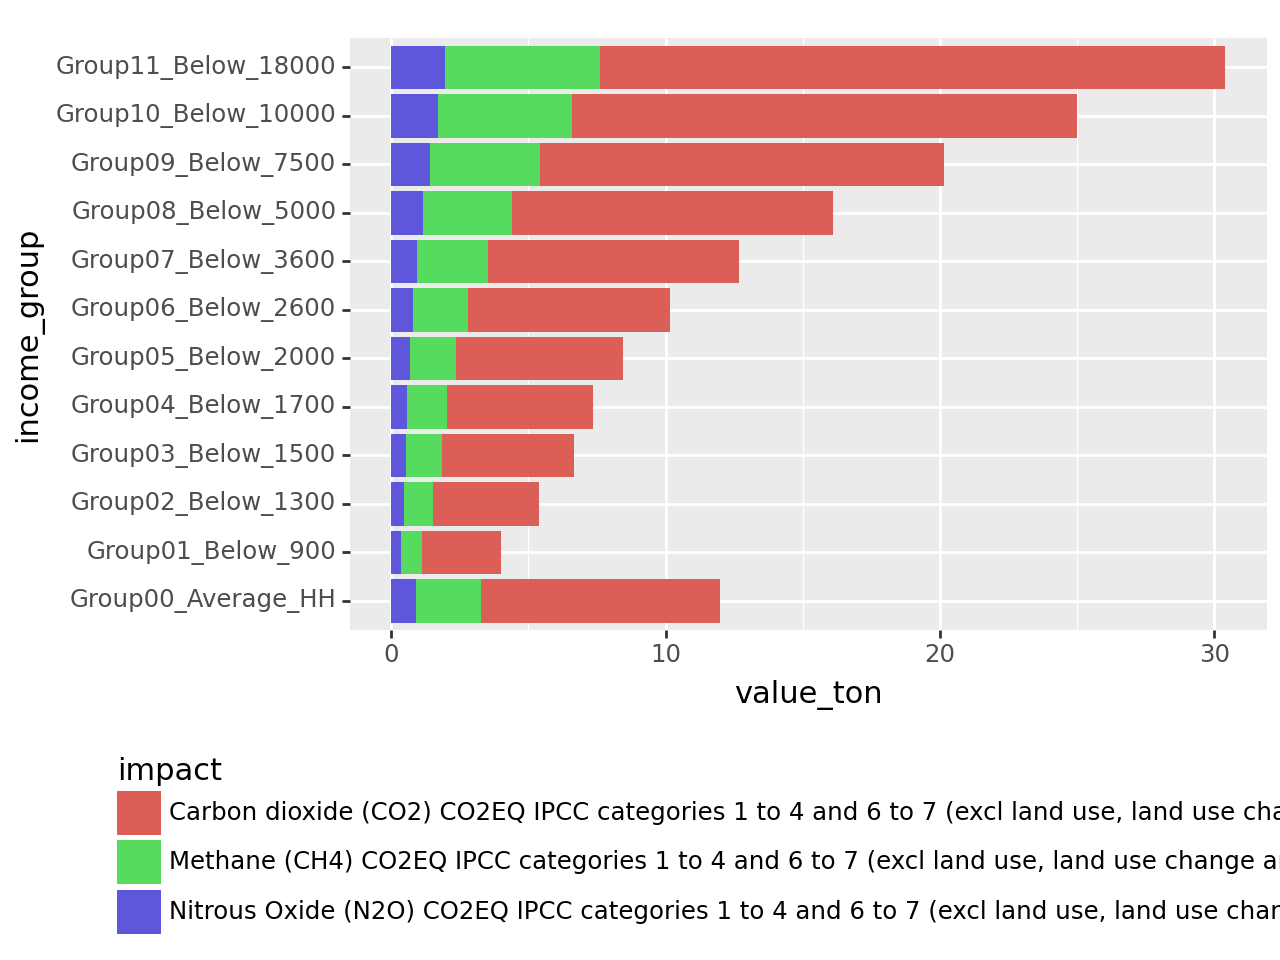

<Figure Size: (640 x 480)>

In [27]:
(
ggplot(data2plot, aes(x = 'income_group', y = 'value_ton', fill = 'impact')) + 
    geom_col() + 
    #facet_wrap('~impact', ncol =1) + 
    coord_flip() + 
    theme(legend_position = 'bottom', legend_direction = 'vertical') 
    )

## Step 7: Break down emissions by final demanded product

To break down emissions by final product we need to calculate $D = S*L*\hat{Y}$. However, in our case $Y$ is already a matrix, thus we cannot diagnoalise it as we did when $Y$ when was just a vector. 
One option we have is to calculate the broken down emissions **seperatedely** for each income group. Thus, we can extract the respective column from Y for each income group, convert it to a vector and then diagnolise it. This is best done within a for loop: 

(Note: These calculation might take some time. To see the progress we print the income group for each iteration.)

In [14]:
# Create empty list to store results

D_by_income_and_fd_list = []

for income_group in Y_by_income.columns: 
    # print progress (as this takes a while to run): 
    print(income_group, end=',')
    
    # extract the respective column of final demand and convert it to a numpy array:
    y_vector =  Y_by_income.loc[:,income_group].values.flatten()
    
    # diagnoalise this vector and convert to pd DataFrame:
    Y_diag = pd.DataFrame(np.diag(y_vector), index=exio.L.index, columns=exio.L.columns)
    
    # calculate footprints and append to result list:
    D_by_income_and_fd_list.append(exio.impacts.S.dot(exio.L.dot(Y_diag)))

    

Group00_Average_HH,Group01_Below_900,Group02_Below_1300,Group03_Below_1500,Group04_Below_1700,Group05_Below_2000,Group06_Below_2600,Group07_Below_3600,Group08_Below_5000,Group09_Below_7500,Group10_Below_10000,Group11_Below_18000,

Now we can bind the list elements together to one large dataframe using `pd.concat`, again specifing the keys and axis (1 mean column-wise): 

In [15]:
D_by_income_and_fd = pd.concat(D_by_income_and_fd_list, ignore_index=False, 
                               keys=Y_by_income.columns, axis=1)
D_by_income_and_fd

income_group                                       Group00_Average_HH  \
region                                                             AT   
sector                                                     Paddy rice   
impact                                                                  
Value Added                                                       0.0   
Employment                                                        0.0   
Employment hour                                                   0.0   
GHG emissions (GWP100) | Problem oriented appro...                0.0   
Human toxicity (USEtox) | USEtox2008 | CTUh (Ro...                0.0   
...                                                               ...   
Unused Domestic Extraction - Oil and Gas                          0.0   
Unused Domestic Extraction - Non-metalic Minerals                 0.0   
Unused Domestic Extraction - Iron Ore                             0.0   
Unused Domestic Extraction - Non-ferous metal ores                0.0   
Land use Crop, Forest, Pasture                                    0.0   

income_group                                                       \
region                                                              
sector                                                      Wheat   
impact                                                              
Value Added                                              0.131622   
Employment                                               0.003959   
Employment hour                                       8926.797348   
GHG emissions (GWP100) | Problem oriented appro...  268369.360886   
Human toxicity (USEtox) | USEtox2008 | CTUh (Ro...       0.011252   
...                                                           ...   
Unused Domestic Extraction - Oil and Gas                 0.001766   
Unused Domestic Extraction - Non-metalic Minerals        0.003450   
Unused Domestic Extraction - Iron Ore                    0.000524   
Unused Domestic Extraction - Non-ferous metal ores       0.002223   
Land use Crop, Forest, Pasture                           1.274659   

income_group                                                          \
region                                                                 
sector                                             Cereal grains nec   
impact                                                                 
Value Added                                                 0.087608   
Employment                                                  0.002117   
Employment hour                                          4801.979909   
GHG emissions (GWP100) | Problem oriented appro...     111455.024819   
Human toxicity (USEtox) | USEtox2008 | CTUh (Ro...          0.006368   
...                                                              ...   
Unused Domestic Extraction - Oil and Gas                    0.001015   
Unused Domestic Extraction - Non-metalic Minerals           0.002218   
Unused Domestic Extraction - Iron Ore                       0.000336   
Unused Domestic Extraction - Non-ferous metal ores          0.001622   
Land use Crop, Forest, Pasture                              0.482445   

income_group                                                                \
region                                                                       
sector                                             Vegetables, fruit, nuts   
impact                                                                       
Value Added                                                       1.879902   
Employment                                                        0.068799   
Employment hour                                              153562.245086   
GHG emissions (GWP100) | Problem oriented appro...           660821.065334   
Human toxicity (USEtox) | USEtox2008 | CTUh (Ro...                0.087265   
...                                                                    ...   
Unused 

`D_by_income_and_fd` has now three dimensional columns for the dimensions: income group, sector and country. The first column of this dataframe, for example, contains all emissions related to the final consumption of Austrian Paddy Rice by the average income group (Group00).  

To further analyse these results we convert this dataframe again from the wide to the long format: 


In [16]:
df = pd.melt(D_by_income_and_fd.reset_index(), id_vars=['impact'])
df

,impact,income_group,region,sector,value
0,Value Added,Group00_Average_HH,AT,Paddy rice,0.0
1,Employment,Group00_Average_HH,AT,Paddy rice,0.0
2,Employment hour,Group00_Average_HH,AT,Paddy rice,0.0
3,GHG emissions (GWP100) | Problem oriented appr...,Group00_Average_HH,AT,Paddy rice,0.0
4,Human toxicity (USEtox) | USEtox2008 | CTUh (R...,Group00_Average_HH,AT,Paddy rice,0.0
...,...,...,...,...,...
14817595,Unused Domestic Extraction - Oil and Gas,Group11_Below_18000,WM,Extra-territorial organizations and bodies,0.0
14817596,Unused Domestic Extraction - Non-metalic Minerals,Group11_Below_18000,WM,Extra-territorial organizations and bodies,0.0
14817597,Unused Domestic Extraction - Iron Ore,Group11_Below_18000,WM,Extra-territorial organizations and bodies,0.0
14817598,Unused Domestic Extraction - Non-ferous metal ...,Group11_Below_18000,WM,Extra-territorial organizations and bodies,0.0


We exclude all zero values to save some memory: 

In [17]:
df = df[df['value'] > 0]

It's often more convenient to have the variables (e.g. income group, impacts type, sector, region) as **indices** instead of individual columns, whereas the values (column: `value`) are of course better placed as individual column. To put the variables as MultiIndex we use the `set_index` method: 

In [18]:
df.set_index(keys=['impact', "income_group", "region", "sector"], inplace=True)

Now, we select CO2 emissions using the `.loc` method. NOte: we can only use .loc because we set the variables as Index beforehand.  

In [19]:
df_co2 = df.loc['Carbon dioxide (CO2) CO2EQ IPCC categories 1 to 4 and 6 to 7 (excl land use, land use change and forestry)']

Next, we want to know for each income group for how much CO2 emissions each finally demanded product is responsible. Thus, we sum over income groups and sectors: 

In [20]:
df_co2_by_fd = df_co2.groupby(level=['income_group', 'sector']).sum()
df_co2_by_fd

value
income_group        sector                                                        
Group00_Average_HH  Additives/Blending Components                         0.000002
                    Air transport services (62)                         546.409995
                    Animal products nec                                   3.287930
                    Anthracite                                            1.222198
                    Aviation Gasoline                                     0.013095
...                                                                            ...
Group11_Below_18000 Wholesale trade and commission trade services, ...   12.077238
                    Wood and products of wood and cork (except furn...  102.579289
                    Wood waste for treatment: incineration               21.033118
                    Wood waste for treatment: landfill                    1.647652
                    products of Vegetable oils and fats                   5.647104

[1620 rows x 1 columns]

Then, we can calcualte the shares of each sector of total emissions by income group (that's why we first group by income group): 

In [21]:
df_co2_by_fd['share'] =  df_co2_by_fd.groupby(['income_group'])['value'].transform(lambda x: x / x.sum())
df_co2_by_fd

value  \
income_group        sector                                                           
Group00_Average_HH  Additives/Blending Components                         0.000002   
                    Air transport services (62)                         546.409995   
                    Animal products nec                                   3.287930   
                    Anthracite                                            1.222198   
                    Aviation Gasoline                                     0.013095   
...                                                                            ...   
Group11_Below_18000 Wholesale trade and commission trade services, ...   12.077238   
                    Wood and products of wood and cork (except furn...  102.579289   
                    Wood waste for treatment: incineration               21.033118   
                    Wood waste for treatment: landfill                    1.647652   
                    products of Vegetable oils and fats                   5.647104   

                                                                               share  
income_group        sector                                                            
Group00_Average_HH  Additives/Blending Components                       1.957872e-10  
                    Air transport services (62)                         6.269607e-02  
                    Animal products nec                                 3.772630e-04  
                    Anthracite                                          1.402372e-04  
                    Aviation Gasoline                                   1.502513e-06  
...                                                                              ...  
Group11_Below_18000 Wholesale trade and commission trade services, ...  5.299540e-04  
                    Wood and products of wood and cork (except furn...  4.501220e-03  
                    Wood waste for treatment: incineration              9.229415e-04  
                    Wood waste for treatment: landfill                  7.229962e-05  
                    products of Vegetable oils and fats                 2.477972e-04  

[1620 rows x 2 columns]

Since we are interested in the 3 largest contributors by income group we rank the emissions (again first grouped by income group) using the `rank` method, and assigning the ranks as a column. 

Then we can filter the dataframe by ranks smaller than 4: 

In [22]:
df_co2_by_fd['rank'] = df_co2_by_fd.groupby(['income_group'])['value'].rank(method='first', ascending=False)
df_co2_by_fd[df_co2_by_fd['rank'] < 4]

value  \
income_group        sector                                                         
Group00_Average_HH  Air transport services (62)                       546.409995   
                    Chemicals nec                                     591.148533   
                    Electricity by coal                               643.525345   
Group01_Below_900   Chemicals nec                                     238.284408   
                    Electricity by coal                               350.293999   
                    Real estate services (70)                         256.894610   
Group02_Below_1300  Chemicals nec                                     316.022495   
                    Electricity by coal                               400.835426   
                    Real estate services (70)                         307.622293   
Group03_Below_1500  Chemicals nec                                     375.450639   
                    Electricity by coal                               439.980727   
                    Real estate services (70)                         344.053274   
Group04_Below_1700  Chemicals nec                                     404.158866   
                    Electricity by coal                               470.121641   
                    Real estate services (70)                         363.456975   
Group05_Below_2000  Chemicals nec                                     454.226825   
                    Electricity by coal                               511.565959   
                    Real estate services (70)                         394.344155   
Group06_Below_2600  Chemicals nec                                     508.675980   
                    Electricity by coal                               600.243148   
                    Real estate services (70)                         442.357998   
Group07_Below_3600  Chemicals nec                                     617.075327   
                    Electricity by coal                               691.125301   
                    Motor Gasoline                                    581.292358   
Group08_Below_5000  Air transport services (62)                       761.615434   
                    Electricity by coal                               828.321145   
                    Motor Gasoline                                    777.230489   
Group09_Below_7500  Air transport services (62)                      1088.603425   
                    Chemicals nec                                     934.220341   
                    Motor Gasoline                                    911.764859   
Group10_Below_10000 Air transport services (62)                      1466.631879   
                    Chemicals nec                                    1245.859218   
                    Motor vehicles, trailers and semi-trailers (34)  1201.089698   
Group11_Below_18000 Air transport services (62)                      2945.180640   
                    Chemicals nec                                    1316.010147   
                    Motor vehicles, trailers and semi-trailers (34)  1704.751164   

                                                                        share  \
income_group        sector                                                      
Group00_Average_HH  Air transport services (62)                      0.062696   
                    Chemicals nec                                    0.067829   
                    Electricity by coal                              0.073839   
Group01_Below_900   Chemicals nec                                    0.082684   
                    Electricity by coal                              0.121551   
                    Real estate services (70)                        0.089141   
Group02_Below_1300  Chemicals nec                                    0.081373   
                    Electricity by coal                              0.103212   
                    Real estate services (70)                        0.0

Higher income groups: Air transport is number 1, also Motor vehicles, trailers and semi-trailers (34) ranks high. 

Lower income groups: Real estate services (70) (probably mostly rents) and Electricity by coal rank high. 

For all income groups: Chemicals nec ranks high